#Predicting DBS Stock Price using RNN (LSTM)

---





#Step 1: Load the Data

##1a) Install Yahoo Finance

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


##1b) Import All Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #for Normalization later
import yfinance as yf

##1c) Choosing Start and End Dates 

In [3]:
start_date = '2021-01-01'
end_date = '2022-01-01'
ticker = 'D05.SI' # DBS Bank
stock_dataset = yf.download(ticker, start=start_date, end=end_date)

display(stock_dataset.head(10)) #display first 10 days

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,25.129999,25.340000,25.010000,25.340000,23.736481,2156614
2021-01-05,25.219999,25.350000,25.090000,25.350000,23.745848,2076800
2021-01-06,25.299999,25.350000,25.070000,25.180000,23.586605,3807600
2021-01-07,25.680000,26.180000,25.629999,26.049999,24.401550,11938600
2021-01-08,26.549999,27.469999,26.500000,27.420000,25.684858,14510800
2021-01-11,27.389999,27.389999,26.920000,26.920000,25.216499,5528700
2021-01-12,26.790001,26.860001,26.520000,26.730000,25.038521,4847200
2021-01-13,27.000000,27.100000,26.719999,26.760000,25.066624,3740200
2021-01-14,26.900000,26.990000,26.770000,26.990000,25.282068,2521200


##1d) Visualize the Data

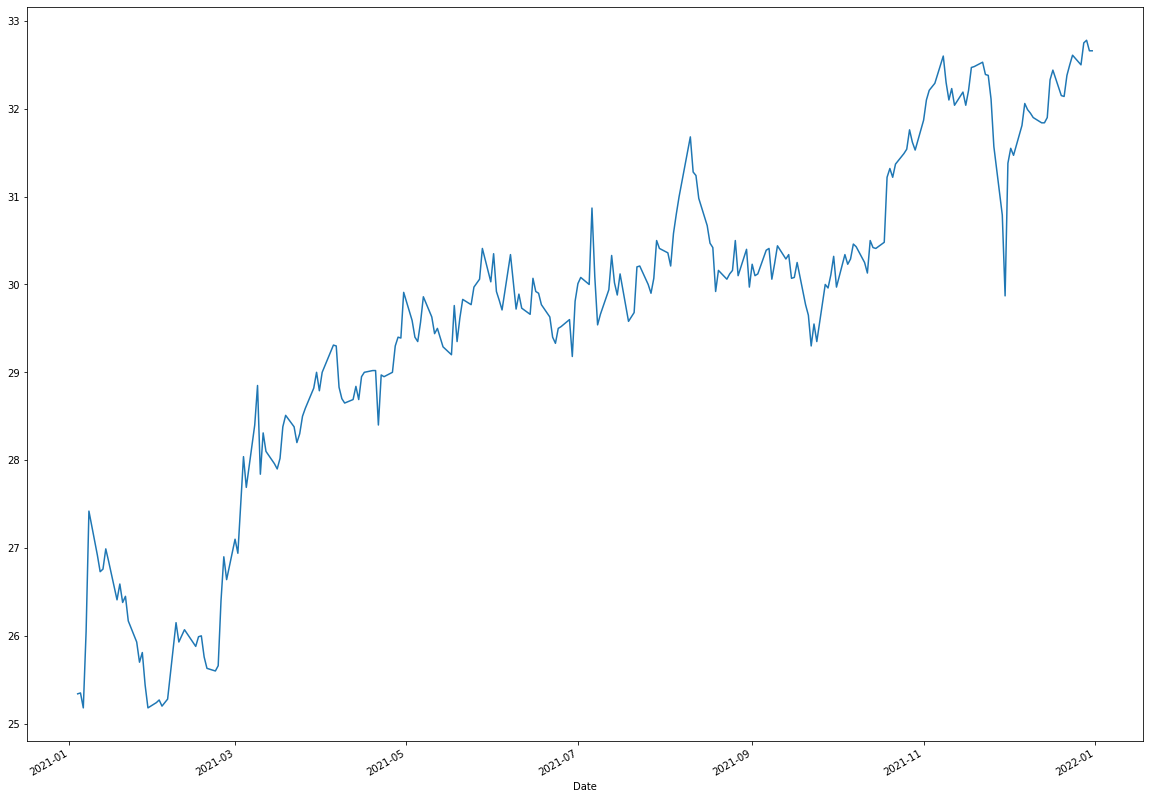

In [4]:
stock_dataset['Close'].plot(figsize = (20, 15))

##1e) Extract the 'Close' Price

In [5]:
import tensorflow as tf

dataset = stock_dataset['Close'].values

In [6]:
dataset

array([25.34000015, 25.35000038, 25.18000031, 26.04999924, 27.42000008,
       26.92000008, 26.72999954, 26.76000023, 26.98999977, 26.85000038,
       26.40999985, 26.59000015, 26.37999916, 26.45000076, 26.17000008,
       25.93000031, 25.70000076, 25.80999947, 25.44000053, 25.18000031,
       25.23999977, 25.27000046, 25.20000076, 25.23999977, 25.28000069,
       26.14999962, 25.93000031, 26.        , 26.06999969, 25.87999916,
       25.98999977, 26.        , 25.76000023, 25.62999916, 25.60000038,
       25.65999985, 26.39999962, 26.89999962, 26.63999939, 27.10000038,
       26.94000053, 27.47999954, 28.04000092, 27.69000053, 28.39999962,
       28.85000038, 27.84000015, 28.30999947, 28.10000038, 27.95999908,
       27.89999962, 28.02000046, 28.37999916, 28.51000023, 28.37999916,
       28.20000076, 28.29999924, 28.5       , 28.59000015, 28.81999969,
       29.        , 28.79000092, 29.        , 29.30999947, 29.29999924,
       28.82999992, 28.70000076, 28.64999962, 28.69000053, 28.84

In [7]:
dataset.shape 
# 253 'Close' prices... meaning 253 days of data...

#1 year = 365 days
#1 month = 4 weekends = 4x2 = 8 non-market opening days

#1 year = 365 - (8x12) = 269 WORKING days
#but there are public holidays too (market is not open)
#and febrauary month might have 5 weeks
#that's how we derive 253 days of market opening / "working" days..

(253,)

In [8]:
dataset = dataset[..., tf.newaxis]
#convert entire dataset to 1 column

In [9]:
dataset[252]

array([32.65999985])

In [10]:
dataset.shape
#253 rows x 1 column

(253, 1)

##1f) Plot the Dataset

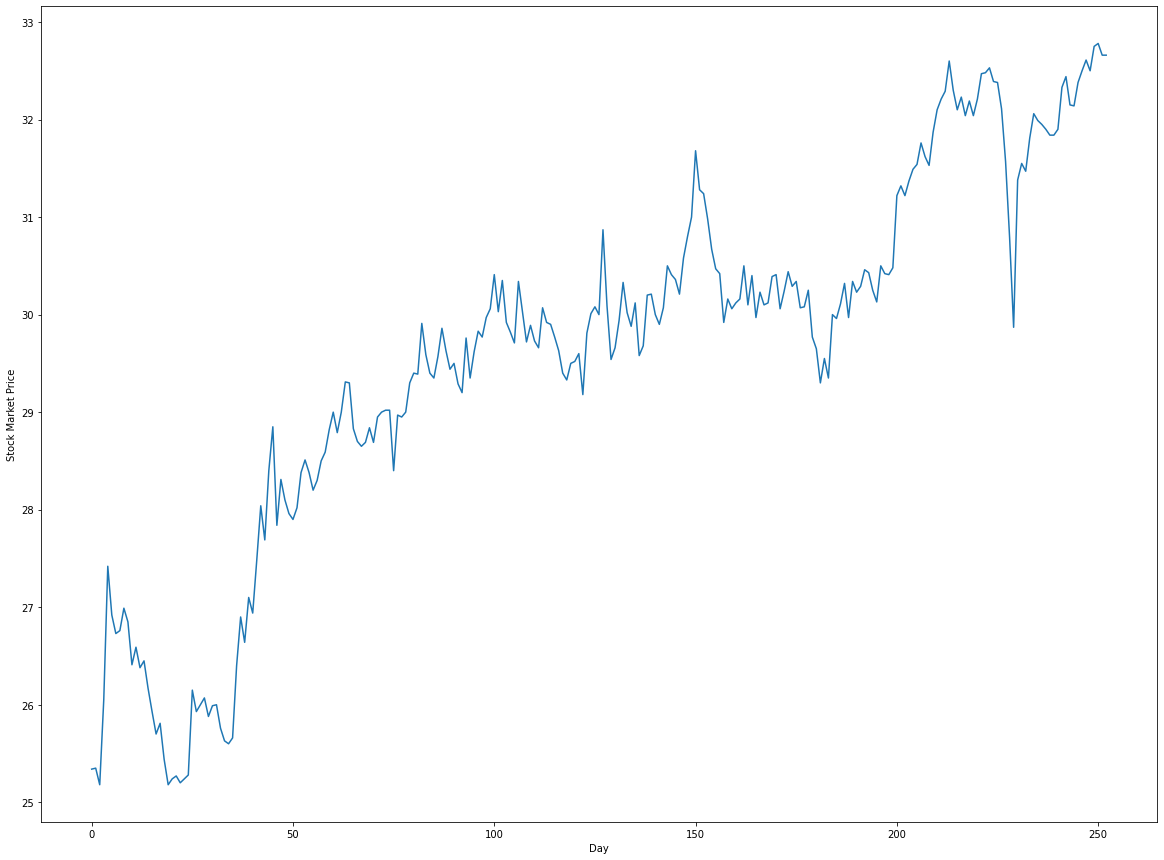

In [11]:
plt.figure(figsize=(20,15))
plt.plot(dataset)

plt.xlabel('Day')
plt.ylabel('Stock Market Price')
plt.show()

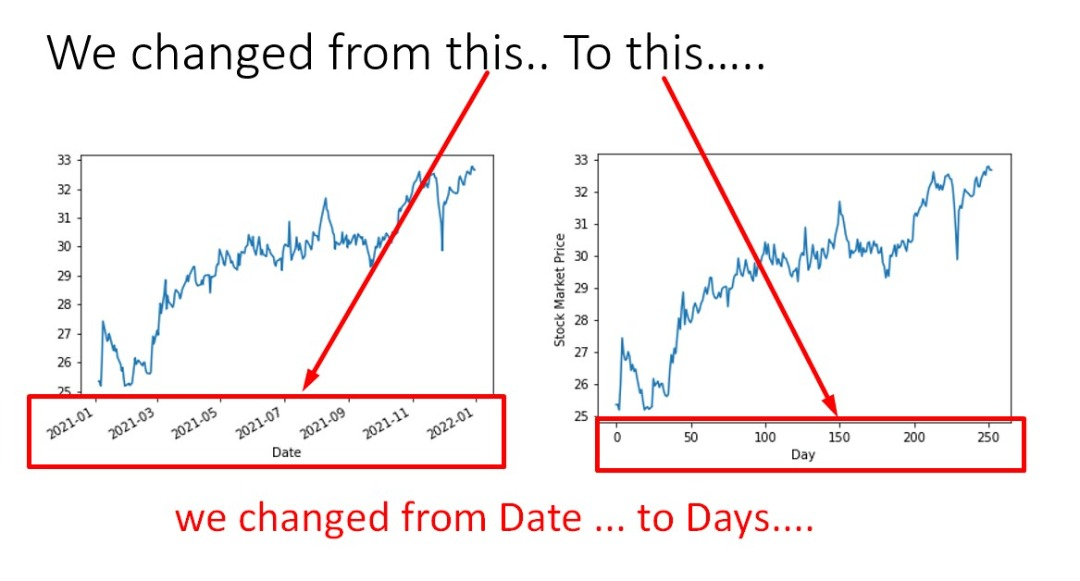



---



#Step 2: Create Sliding Window

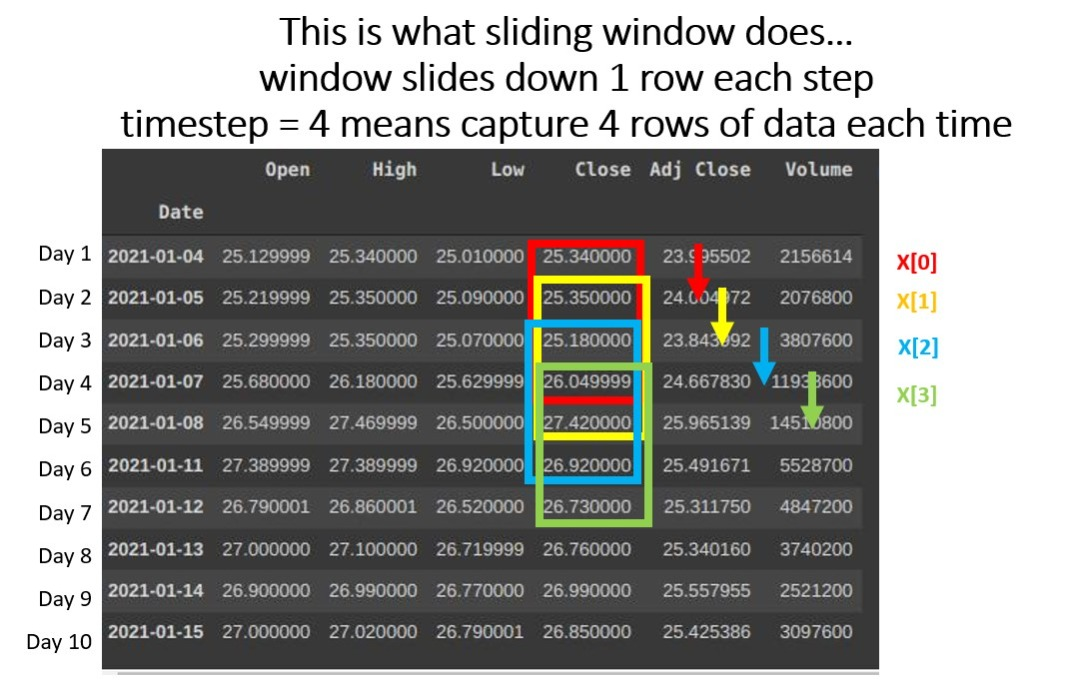

##2a) Defining the Sliding Window Function

In [12]:
# Define sliding window
#kindly ignore the details inside the "def" and "for" loop....

def sliding_window(data, seq_length):
    x = [] #create an empty array to put data inside later
    y = []


    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)] #day 1 to day 5
        _y = data[i+seq_length] #next day -> day 6
        x.append(_x) #appending (put inside) the x empty array
        y.append(_y)

    return np.array(x), np.array(y)

##2b) Normalize the Data

In [13]:
# Normalization
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

#we normalize because Machine Learning likes to use small numbers...
#not large numbers... harder to crunch....

##2c) Defining Timesteps

In [14]:
timesteps = 4 #4 is the window size
X, y = sliding_window(dataset, timesteps)

In [15]:
X
#you can see each window is capturing 4 row (days) of close price data
#and the subsequent window is the next sliding window

array([[[0.02105262],
        [0.02236844],
        [0.        ],
        [0.11447357]],

       [[0.02236844],
        [0.        ],
        [0.11447357],
        [0.29473687]],

       [[0.        ],
        [0.11447357],
        [0.29473687],
        [0.22894738]],

       [[0.11447357],
        [0.29473687],
        [0.22894738],
        [0.20394731]],

       [[0.29473687],
        [0.22894738],
        [0.20394731],
        [0.20789477]],

       [[0.22894738],
        [0.20394731],
        [0.20789477],
        [0.23815787]],

       [[0.20394731],
        [0.20789477],
        [0.23815787],
        [0.2197369 ]],

       [[0.20789477],
        [0.23815787],
        [0.2197369 ],
        [0.16184208]],

       [[0.23815787],
        [0.2197369 ],
        [0.16184208],
        [0.18552633]],

       [[0.2197369 ],
        [0.16184208],
        [0.18552633],
        [0.15789462]],

       [[0.16184208],
        [0.18552633],
        [0.15789462],
        [0.16710536]],

       [[0

In [16]:
X.shape
#248 rows of data (working days)...hmm seems like some days got chopped off
#after scaling and sliding window... coz initially was 253...

#4 rows or days per 1 slicing window

(248, 4, 1)

In [17]:
X[0] #first window -> day 1, 2, 3, 4

array([[0.02105262],
       [0.02236844],
       [0.        ],
       [0.11447357]])

In [18]:
X[1] #second window -> day 2, 3, 4, 5

array([[0.02236844],
       [0.        ],
       [0.11447357],
       [0.29473687]])

In [19]:
y[0] 
# y is next day price, so is day 5
#i'm using the past 4 days to predict the next day price, day 5 
#or rather, day 5's actual price is used as the "learning" price

array([0.29473687])

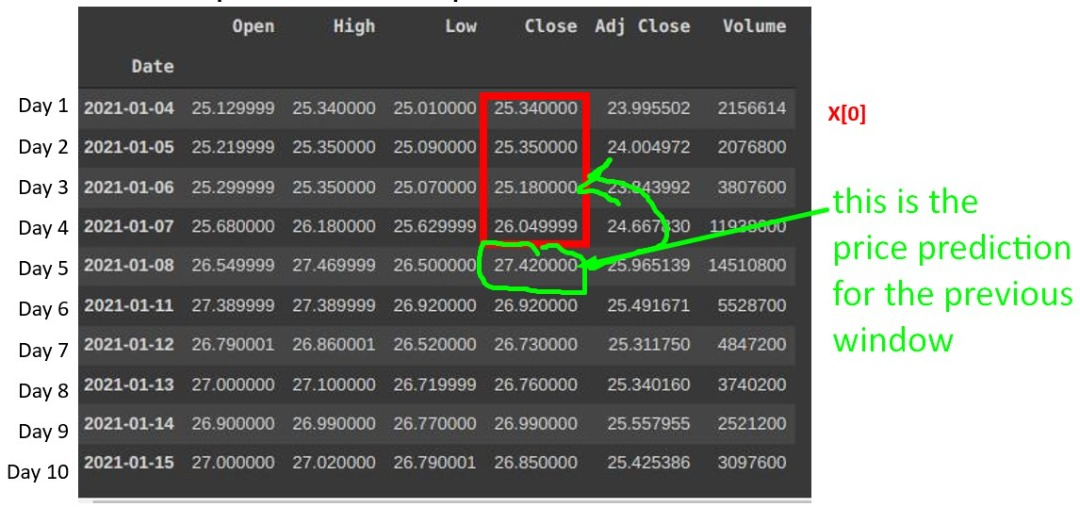



---



#Step 3: Train Test Split

##3a) Defining the Size for Training and Testing (using the length of y)

In [20]:
train_size = int(len(y) * 0.67) 
#training size is 2/3 of the dataset

test_size = int(len(y) - train_size)
#testing size is 1/3 of the dataset

In [21]:
train_size 
#166 rows of data = 166 days used for training the model

166

In [22]:
test_size
#82 rows of data = 82 days used for testing the model

#total 166 + 82  = 248 days (market opening days)

82

##3b) Assigning Data into the Train Test Split

In [23]:
#you may skip below if you don't fully understand

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

##3c) Defining the Feature Size and Hidden Size (for preparation of the LSTM model)

In [24]:
feature = 1 
#is 1 because every data point is a number
#but if its a word, i need to convert the word to a vector
#and if my vector has 100, then i need to have a feature = 100  
#in other words, there's no need for vectorization here

hidden_size = 5 
#memory size, up to you
#(i've yet to understand this fully...)

##3d) Reshaping X_train and X_test to store information about the Batch, Timesteps, Feature

LSTM input definition

inputs = np.random.randn(batch, timesteps, feature))

In [25]:
# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, feature))

# batch size = X_train.shape[0]
# timesteps = 4 because its the size of sliding window
# feature = 1 as explained earlier

In [26]:
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, feature))

In [27]:
X_test

array([[[[0.66447372]],

        [[0.64736856]],

        [[0.6500002 ]],

        [[0.68552633]]],


       [[[0.64736856]],

        [[0.6500002 ]],

        [[0.68552633]],

        [[0.68815797]]],


       [[[0.6500002 ]],

        [[0.68552633]],

        [[0.68815797]],

        [[0.64210528]]],


       [[[0.68552633]],

        [[0.68815797]],

        [[0.64210528]],

        [[0.66578954]]],


       [[[0.68815797]],

        [[0.64210528]],

        [[0.66578954]],

        [[0.69210543]]],


       [[[0.64210528]],

        [[0.66578954]],

        [[0.69210543]],

        [[0.67236864]]],


       [[[0.66578954]],

        [[0.69210543]],

        [[0.67236864]],

        [[0.67894748]]],


       [[[0.69210543]],

        [[0.67236864]],

        [[0.67894748]],

        [[0.6434211 ]]],


       [[[0.67236864]],

        [[0.67894748]],

        [[0.6434211 ]],

        [[0.64473692]]],


       [[[0.67894748]],

        [[0.6434211 ]],

        [[0.64473692]],

       



---



#Step 4: Building the RNN Model

##4a) Apply LSTM RNN

LSTM RNN takes up the entire hidden layers, and we only have 1 output layer to predict the stock price`

In [28]:
from re import L #ignore this
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
  LSTM( hidden_size, 
       activation='tanh', 
       input_shape=(timesteps, feature)),
  
  Dense(1, activation='linear')  
])


##4b) Visualize the Model

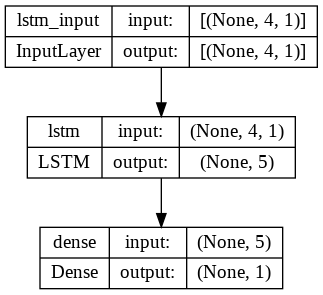

In [29]:
import pydot
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

##4c) Compile the Model

In [30]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.002)

model.compile(
    loss='mse', 
    optimizer=ADAM)



---



#Step 5: Training the Model

In [31]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 3s 6ms/step - loss: 0.3633
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2968
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2369
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1842
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1390
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1003
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0303
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 13/1000
6/6 [==============================



---



#Step 6: Save the Model

In [32]:
model.save('Stock_Price_Prediction_RNN_Trained_Model.h5')



---



#Step 7: Load the Model

In [33]:
#model = keras.models.load_model('Stock_Price_Prediction_RNN_Trained_Model.h5')

#though not needed here, we will load this model for future use
#so that we don't have to run the 1000 epochs as it takes long time



---



#Step 8: Predicting Prices Using Existing Dataset - X

##8a) Recall What Is X (the rolling window)

In [34]:
X

#X is a rolling window
#each window is capturing 4 row (days) of close price data
#and the subsequent window is the next sliding window

#the values have been normalized between 0 and 1
#0 being the lowest price while 1 being the highest price

array([[[0.02105262],
        [0.02236844],
        [0.        ],
        [0.11447357]],

       [[0.02236844],
        [0.        ],
        [0.11447357],
        [0.29473687]],

       [[0.        ],
        [0.11447357],
        [0.29473687],
        [0.22894738]],

       [[0.11447357],
        [0.29473687],
        [0.22894738],
        [0.20394731]],

       [[0.29473687],
        [0.22894738],
        [0.20394731],
        [0.20789477]],

       [[0.22894738],
        [0.20394731],
        [0.20789477],
        [0.23815787]],

       [[0.20394731],
        [0.20789477],
        [0.23815787],
        [0.2197369 ]],

       [[0.20789477],
        [0.23815787],
        [0.2197369 ],
        [0.16184208]],

       [[0.23815787],
        [0.2197369 ],
        [0.16184208],
        [0.18552633]],

       [[0.2197369 ],
        [0.16184208],
        [0.18552633],
        [0.15789462]],

       [[0.16184208],
        [0.18552633],
        [0.15789462],
        [0.16710536]],

       [[0

##8b) Recall What is y (the normalized actual prices used for Training)

In [35]:
y[0]

#this is the 5th day actual price (taken from X)

array([0.29473687])

In [36]:
y

#y captures and stores all pricing from day 5 onwards, taking them as 
#the actual pricing for training purpose

array([[0.29473687],
       [0.22894738],
       [0.20394731],
       [0.20789477],
       [0.23815787],
       [0.2197369 ],
       [0.16184208],
       [0.18552633],
       [0.15789462],
       [0.16710536],
       [0.13026315],
       [0.09868423],
       [0.06842113],
       [0.08289464],
       [0.03421056],
       [0.        ],
       [0.00789467],
       [0.01184213],
       [0.00263164],
       [0.00789467],
       [0.01315795],
       [0.12763151],
       [0.09868423],
       [0.10789472],
       [0.11710521],
       [0.09210513],
       [0.1065789 ],
       [0.10789472],
       [0.07631579],
       [0.05921039],
       [0.05526318],
       [0.06315785],
       [0.16052626],
       [0.22631574],
       [0.19210518],
       [0.25263164],
       [0.23157902],
       [0.30263154],
       [0.37631595],
       [0.33026325],
       [0.42368421],
       [0.48289484],
       [0.35000005],
       [0.41184208],
       [0.38421061],
       [0.36578939],
       [0.35789472],
       [0.373

##8c) Obtain y_: Un-Normalized Actual Prices

In [37]:
y_ = sc.inverse_transform(y)      

#we un-normalize y to get back the actual price

In [38]:
y_

array([[27.42000008],
       [26.92000008],
       [26.72999954],
       [26.76000023],
       [26.98999977],
       [26.85000038],
       [26.40999985],
       [26.59000015],
       [26.37999916],
       [26.45000076],
       [26.17000008],
       [25.93000031],
       [25.70000076],
       [25.80999947],
       [25.44000053],
       [25.18000031],
       [25.23999977],
       [25.27000046],
       [25.20000076],
       [25.23999977],
       [25.28000069],
       [26.14999962],
       [25.93000031],
       [26.        ],
       [26.06999969],
       [25.87999916],
       [25.98999977],
       [26.        ],
       [25.76000023],
       [25.62999916],
       [25.60000038],
       [25.65999985],
       [26.39999962],
       [26.89999962],
       [26.63999939],
       [27.10000038],
       [26.94000053],
       [27.47999954],
       [28.04000092],
       [27.69000053],
       [28.39999962],
       [28.85000038],
       [27.84000015],
       [28.30999947],
       [28.10000038],
       [27

##8d) Using the Trained RNN Model to Predict X dataset (yhat)

In [39]:
yhat = model.predict(X)

#fitting the model to X dataset

8/8 [==============================] - 0s 3ms/step


In [40]:
yhat = sc.inverse_transform(yhat) 

#un-normalizing yhat to get the predicted price

In [41]:
yhat

#previewing the predicted prices

array([[25.898035],
       [27.01636 ],
       [26.982748],
       [26.880157],
       [26.865267],
       [27.01372 ],
       [26.951324],
       [26.62562 ],
       [26.671118],
       [26.51938 ],
       [26.533993],
       [26.337337],
       [26.118246],
       [25.89655 ],
       [25.904753],
       [25.650986],
       [25.411156],
       [25.376099],
       [25.377497],
       [25.335087],
       [25.35168 ],
       [25.38095 ],
       [25.972961],
       [25.996138],
       [26.071661],
       [26.140602],
       [26.02164 ],
       [26.069138],
       [26.084286],
       [25.924019],
       [25.793884],
       [25.7314  ],
       [25.750248],
       [26.264471],
       [26.764679],
       [26.730747],
       [27.071074],
       [27.031223],
       [27.42301 ],
       [27.930027],
       [27.801802],
       [28.315002],
       [28.754524],
       [28.114855],
       [28.339674],
       [28.206068],
       [28.082428],
       [28.009386],
       [28.07645 ],
       [28.35714 ],


In [42]:
yhat.shape

#248 days of predicted prices

(248, 1)

##8e) Visualizing the Prediction

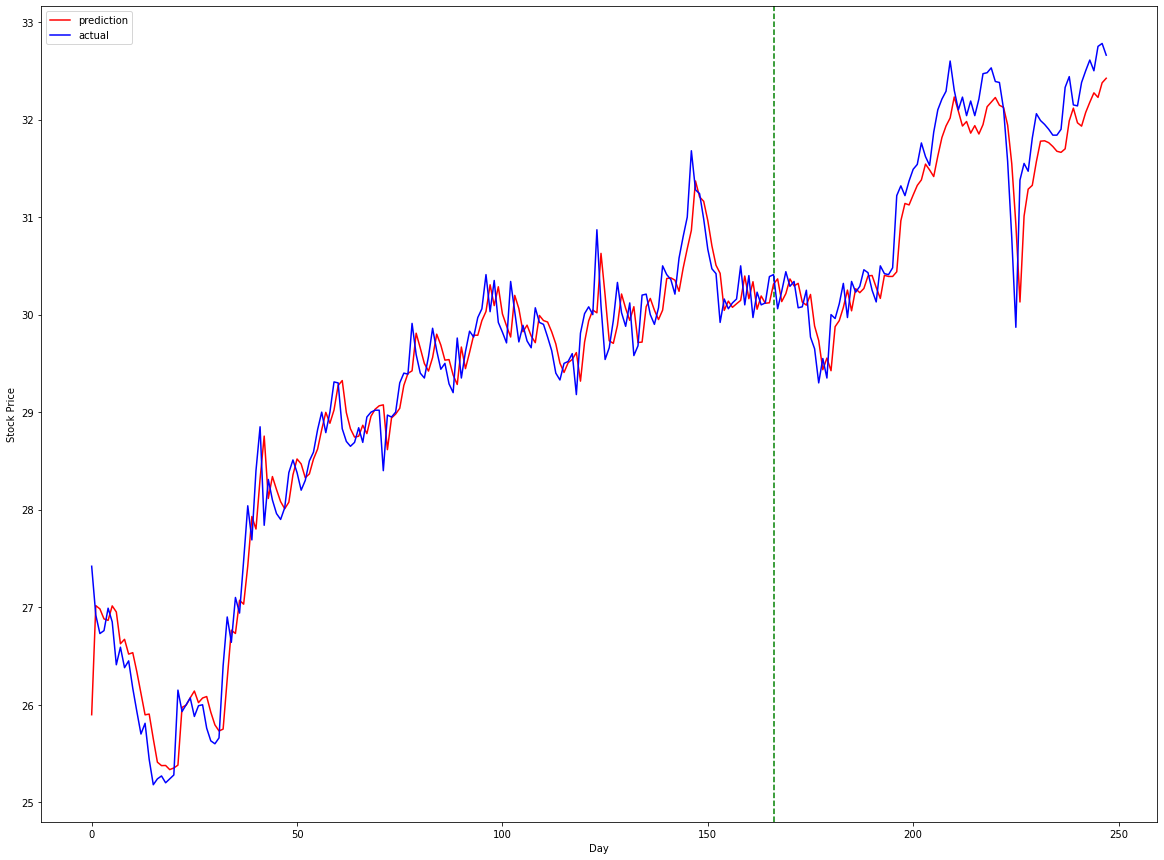

In [43]:
plt.figure(figsize=(20,15))

plt.axvline(x=train_size, c='g', linestyle='--')
#draw a dotted line to show the split between Train vs Test datasets

plt.plot(yhat,'r',label='prediction')
plt.plot(y_,'b',label='actual')
#yhat is the Predicted price using the RNN model
#y_ is the Actual Price

plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##8f) Understanding the Difference between  original_x // yhat // and y_

###8f)(i) Original_x

In [44]:
sd_1 = stock_dataset.filter(['Date', 'Close'])
sd_1

#we extract out only the 'Date' and 'Close' columns from the original dataset

,Close
Date,
2021-01-04,25.340000
2021-01-05,25.350000
2021-01-06,25.180000
2021-01-07,26.049999
2021-01-08,27.420000
...,...
2021-12-27,32.500000
2021-12-28,32.750000
2021-12-29,32.779999


In [45]:
sd_1.insert(loc=0, column='Day', value=np.arange(len(sd_1)))
sd_1

#we insert a Day column....

,Day,Close
Date,,
2021-01-04,0,25.340000
2021-01-05,1,25.350000
2021-01-06,2,25.180000
2021-01-07,3,26.049999
2021-01-08,4,27.420000
...,...,...
2021-12-27,248,32.500000
2021-12-28,249,32.750000
2021-12-29,250,32.779999


In [46]:
original_x = stock_dataset['Close'].values
#we store the 'Close' price into original_x

In [47]:
original_x[4] 
#this is Actual Close price for day 4

27.420000076293945

###8f)(ii) y_[0]

In [48]:
y_[0] 
#we see that this is the actual price for day 4 stored inside y_[1]
#similar to original_x[4] 

array([27.42000008])

###8f)(iii) yhat[0]

In [49]:
yhat[0] 
#this is the PREDICTED price for day 4 stored inside yhat[1]

array([25.898035], dtype=float32)

##8g) Trying to Predict Day 250

In [50]:
yhat[248] 
#we try to PREDICT the price for Day 252 
#but an error pops up: Max size is 248
#which means that we can PREDICT only up to Day 251

#what if we want to predict after Day 251? Please see the next section...

IndexError: ignored



---



#Step 9: Predicting Next Day Price Using New Dataset

##9a) Presume we now have a random past 8 days of Price data

In [80]:
past4days = pd.DataFrame([34, 36, 20, 6])

past4days

,0
0,34
1,36
2,20
3,6


##9b) We Normalize the Past 8 Days Prices

In [81]:
past4days_norm = sc.fit_transform(past4days)

In [82]:
past4days_norm

array([[0.93333333],
       [1.        ],
       [0.46666667],
       [0.        ]])

In [83]:
past4days_norm = past4days_norm[..., tf.newaxis]

#reshape to fit

In [84]:
past4days_norm.shape

(4, 1, 1)

##9c) We Fit the Past 8 Days Prices into the RNN Model

In [85]:
new_pred_norm = model.predict(past4days_norm)

1/1 [==============================] - 0s 21ms/step


In [86]:
new_pred = sc.inverse_transform(new_pred_norm) 

##9d) Predicted Close Price for the 9th Day

In [87]:
new_pred[0]
#the predicted close price for the 5th day is 21.09

array([21.08648], dtype=float32)



---



#Step 10: Visualizing the Loss

In [58]:
loss = history.history['loss']
epoch = range(len(loss))

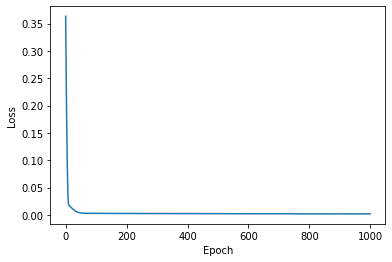

In [59]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



---



#THE END

---

